In [1]:
pip install --upgrade xgboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 193.6/193.6 MB 7.2 MB/s eta 0:00:00
  Attempting uninstall: xgboost
    Found existing installation: xgboost 0.90
    Uninstalling xgboost-0.90:
      Successfully uninstalled xgboost-0.90


In [7]:
#This is subsection to import all the necessary libraries
import pickle
import numpy as np
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt
import plotly.graph_objects as go
import plotly.figure_factory as ff
from plotly import tools
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)
%matplotlib inline

from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,classification_report,roc_auc_score
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
import xgboost as xgb
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import SGDClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.calibration import CalibratedClassifierCV
from sklearn.metrics import log_loss

In [3]:
data=pd.read_csv('/content/Data Set creditcard.csv')

In [4]:
print('Dataset has ',data.shape[0],' rows and ',data.shape[1],' columns')

Dataset has  284807  rows and  31  columns


In [ ]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [ ]:
data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


Only 2 of the features are in their exact form (Time and Amount) and rest all the other feature are PCA transformed values from some d dimensional data to 28D data. It is because the information regarding credit card transaction is confidential to be shared with public. So we can see there are total of 30 dimensional data (excluding class label column). The time column specifies that what time after the first transaction does this transaction happended and amount columns specifies the transaction amount.

In [ ]:
total=data.isnull().sum().sort_values(ascending=False)
percent=data.isnull().sum()/(data.isnull().count()*100).sort_values(ascending=True)
pd.concat([total,percent],axis=1,keys=['Total','Percent']).transpose()

,Time,V16,Amount,V28,V27,V26,V25,V24,V23,V22,...,V10,V9,V8,V7,V6,V5,V4,V3,V2,Class
Total,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Percent,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


As we can see, there is no missing data in the entire dataset.

In [ ]:
temp=data['Class'].value_counts()
df_class=pd.DataFrame({'Class':temp.index,'Values':temp.values})
df_class

,Class,Values
0,0,284315
1,1,492


The dataset is highly imbalanced. Out of 284,807 rows, only 492 datapoints are positive i.e fraud transaction and majority of the rows (284,315) are valid transactions i.e negative labels. 

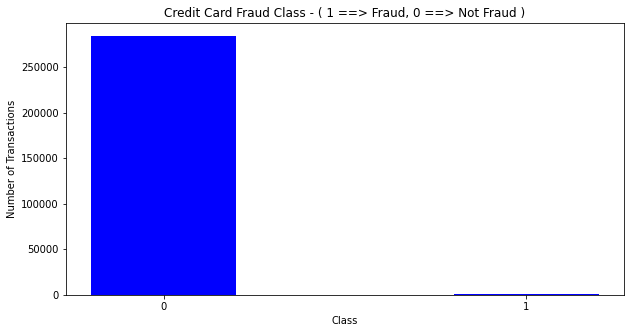

In [ ]:
plt.figure(figsize=(10,5))
plt.bar(df_class['Class'],df_class['Values'],color='Blue',width=0.4)
plt.xlabel('Class')
plt.ylabel('Number of Transactions')
plt.title('Credit Card Fraud Class - ( 1 ==> Fraud, 0 ==> Not Fraud )')
plt.xticks([0,1],['0','1'])
plt.show()

## OBSERVATION --- HIGHLY IMBALANCED DATASET

In [ ]:
data['Hour']=data['Time'].apply(lambda x: np.floor(x/3600))
tmp=data.groupby(['Hour','Class'])['Amount'].agg(['min','max','count','sum','mean','median','var']).reset_index()
df=pd.DataFrame(tmp)
df.columns=['Hour','Class','Min','Max','Transactions','Sum','Mean','Median','Var']
df.head()

,Hour,Class,Min,Max,Transactions,Sum,Mean,Median,Var
0,0.0,0,0.0,7712.43,3961,256572.87,64.774772,12.990,45615.821201
1,0.0,1,0.0,529.00,2,529.00,264.500000,264.500,139920.500000
2,1.0,0,0.0,1769.69,2215,145806.76,65.826980,22.820,20053.615770
3,1.0,1,59.0,239.93,2,298.93,149.465000,149.465,16367.832450
4,2.0,0,0.0,4002.88,1555,106989.39,68.803466,17.900,45355.430437


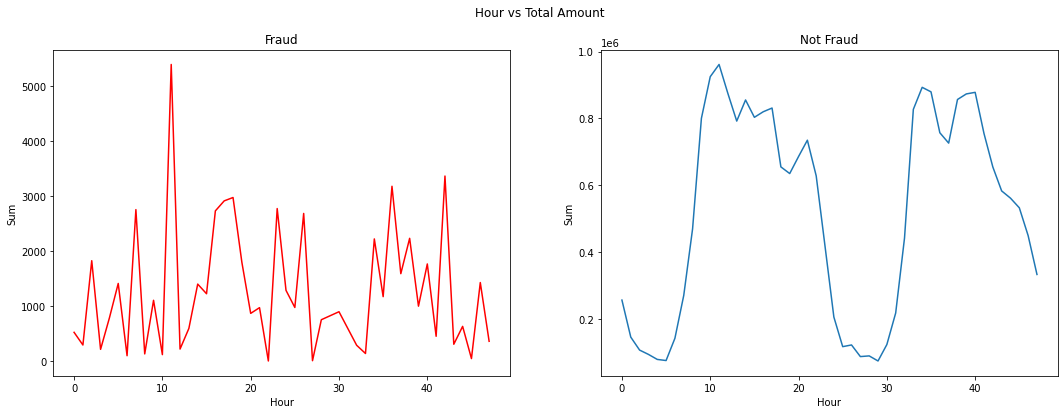

In [ ]:
fig,(ax1,ax2)= plt.subplots(1,2,figsize=(18,6))
s=sns.lineplot(ax=ax1,x='Hour',y='Sum',data=df.loc[df.Class==1],color='Red')
s=sns.lineplot(ax=ax2,x='Hour',y='Sum',data=df.loc[df.Class==0])
ax1.set_title('Fraud')
ax2.set_title('Not Fraud')
fig.suptitle('Hour vs Total Amount')
plt.show()

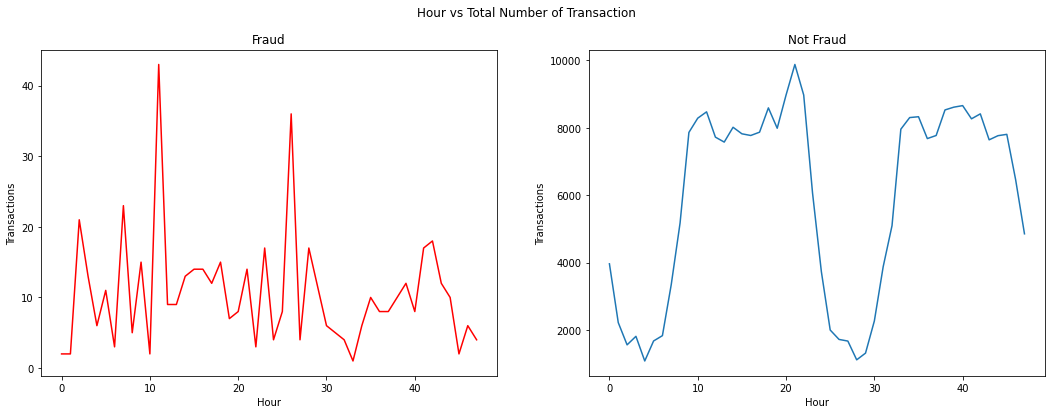

In [ ]:
fig,(ax1,ax2)= plt.subplots(1,2,figsize=(18,6))
s=sns.lineplot(ax=ax1,x='Hour',y='Transactions',data=df.loc[df.Class==1],color='Red')
s=sns.lineplot(ax=ax2,x='Hour',y='Transactions',data=df.loc[df.Class==0])
ax1.set_title('Fraud')
ax2.set_title('Not Fraud')
fig.suptitle('Hour vs Total Number of Transaction')
plt.show()

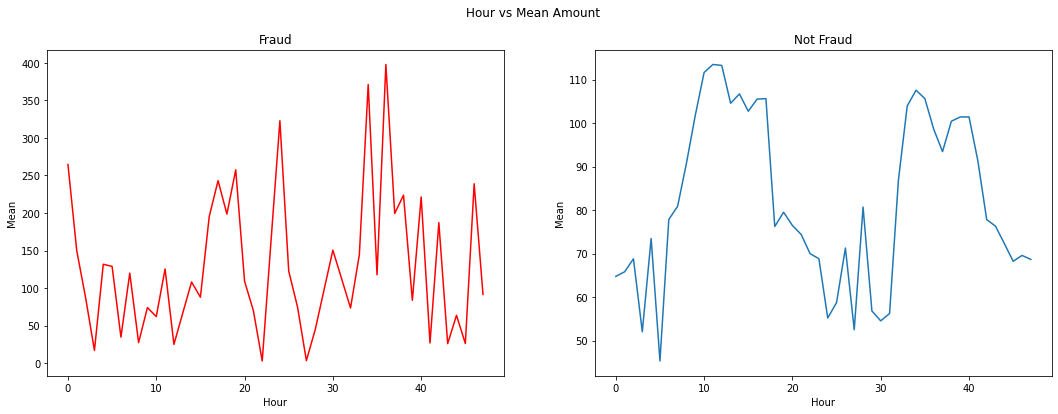

In [ ]:
fig,(ax1,ax2)= plt.subplots(1,2,figsize=(18,6))
s=sns.lineplot(ax=ax1,x='Hour',y='Mean',data=df.loc[df.Class==1],color='Red')
s=sns.lineplot(ax=ax2,x='Hour',y='Mean',data=df.loc[df.Class==0])
ax1.set_title('Fraud')
ax2.set_title('Not Fraud')
fig.suptitle('Hour vs Mean Amount')
plt.show()

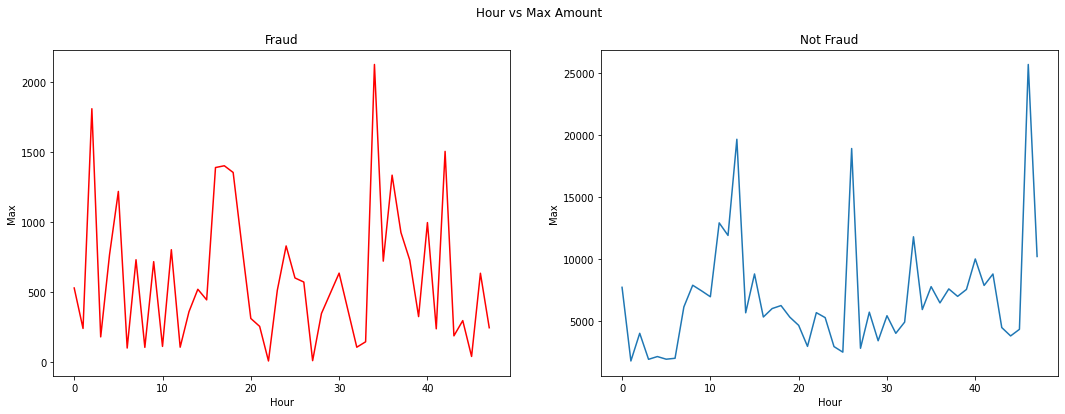

In [ ]:
fig,(ax1,ax2)= plt.subplots(1,2,figsize=(18,6))
s=sns.lineplot(ax=ax1,x='Hour',y='Max',data=df.loc[df.Class==1],color='Red')
s=sns.lineplot(ax=ax2,x='Hour',y='Max',data=df.loc[df.Class==0])
ax1.set_title('Fraud')
ax2.set_title('Not Fraud')
fig.suptitle('Hour vs Max Amount')
plt.show()

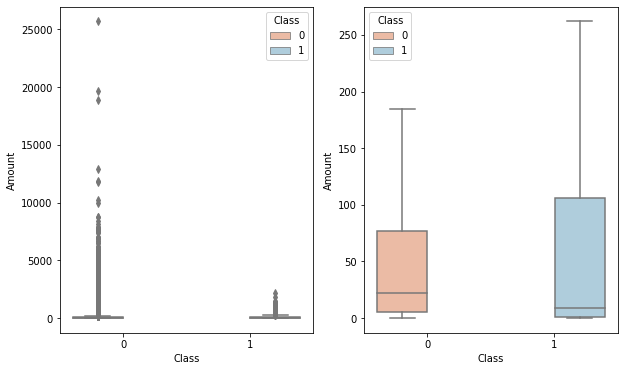

In [ ]:
fig,(ax1,ax2)= plt.subplots(1,2,figsize=(10,6))
sns.boxplot(ax=ax1,x='Class',y='Amount',data=data,palette='RdBu',hue='Class')
sns.boxplot(ax=ax2,x='Class',y='Amount',data=data,palette='RdBu',showfliers=False,hue='Class')
plt.show()

For the non fraudulent transactions, there are way more outliers than the fraudulent transactions. It means all the fraud transactions are within a limited range without an exceptional outlier i.e super high amount transaction

In [ ]:
table1=data[['Class','Amount']]
class0=table1[table1.Class==0]['Amount']
class1=table1[table1.Class==1]['Amount']

In [ ]:
class0.describe()

count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

In [ ]:
class1.describe()

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

By the above 2 description of Amount column with class 1 and class 0, we can derive following properties of the dataset:

1. For fraud cases, mean amount us higher than non fraud cases.
2. The max fraudulent transaction happened was 2125 dollars and the top 25% of fraud transactions are above 105$ which is way above than 75th percentile of non fraud transations. 

A trivial conclusion which we can make is that, although the dataset is highly imbalance, but for the data we have, the fraudulent transactions happening are of higher ammount.

In [ ]:
np.percentile(class0,np.arange(90,101))   ## 90% of not fradulent transactions are below 202$ and 99% below 1016$

array([  202.724 ,   224.85  ,   250.    ,   279.9902,   314.8332,
         364.409 ,   433.1288,   524.8248,   690.    ,  1016.9664,
       25691.16  ])

In [ ]:
np.percentile(class1,np.arange(90,101))   ## 10% of fradulent transactions are above 346$ and 1% above 1357$

array([ 346.746 ,  362.0655,  449.282 ,  503.9102,  561.1668,  640.905 ,
        721.6676,  769.1869,  938.0828, 1357.4279, 2125.87  ])

(32, 32)


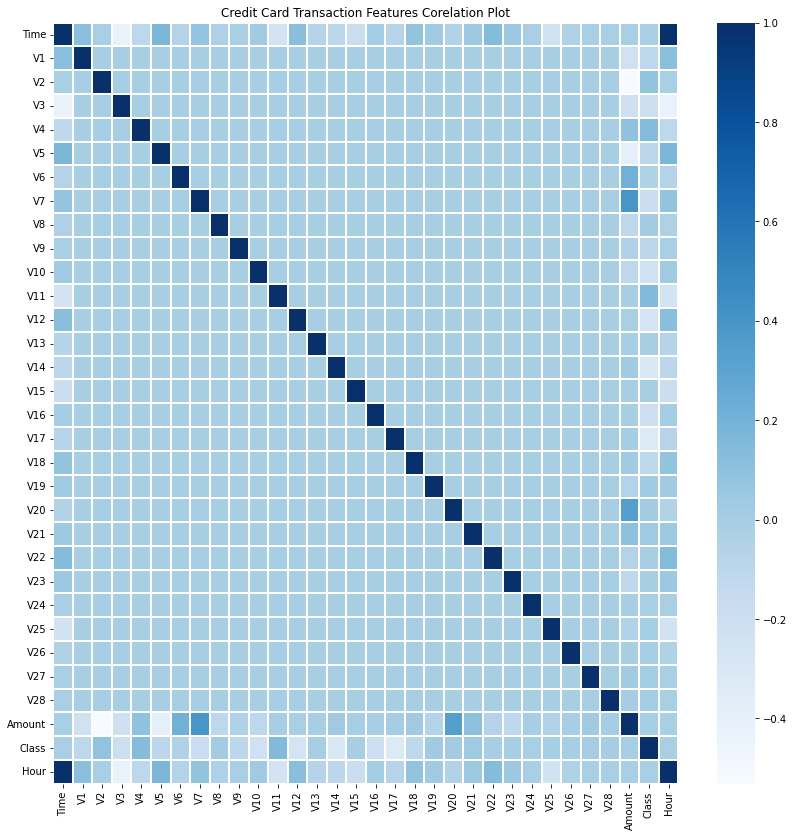

In [ ]:
plt.figure(figsize=(14,14))
plt.title('Credit Card Transaction Features Corelation Plot')
corr=data.corr()
print(corr.shape)
sns.heatmap(corr,xticklabels=corr.columns,yticklabels=corr.columns,linewidth=1,cmap='Blues')
plt.show()

There is no considerable correlation between V1 to V28 features. Also Time has zero or negative correlation with some of the features.

V20 and V7 are highly correlated with Amount.

V2 and V5 are inversely correlated ( negative correlation ) with Amount


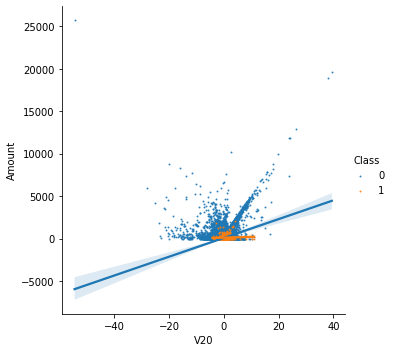

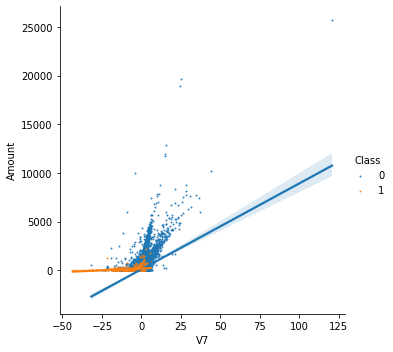

In [ ]:
sns.lmplot(x='V20',y='Amount',data=data,hue='Class',fit_reg=True,scatter_kws={'s':1})
sns.lmplot(x='V7',y='Amount',data=data,hue='Class',fit_reg=True,scatter_kws={'s':1})
plt.show()

Rightly observed, V7 and V20 are positively correlated with Amount. Although we can also see that for both the features V7 and V20, positive class has less positive slope and negative class has high slope thereby high positive correlation.



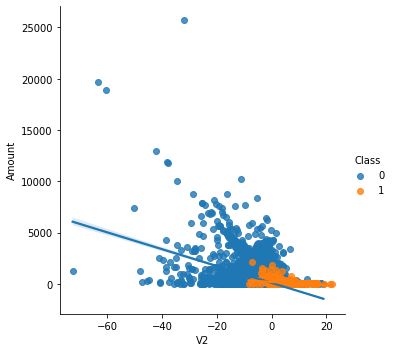

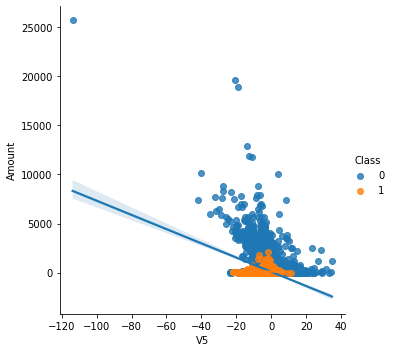

In [ ]:
sns.lmplot(x='V2',y='Amount',data=data,hue='Class',fit_reg=True)
sns.lmplot(x='V5',y='Amount',data=data,hue='Class',fit_reg=True )
plt.show()

<Figure size 432x288 with 0 Axes>

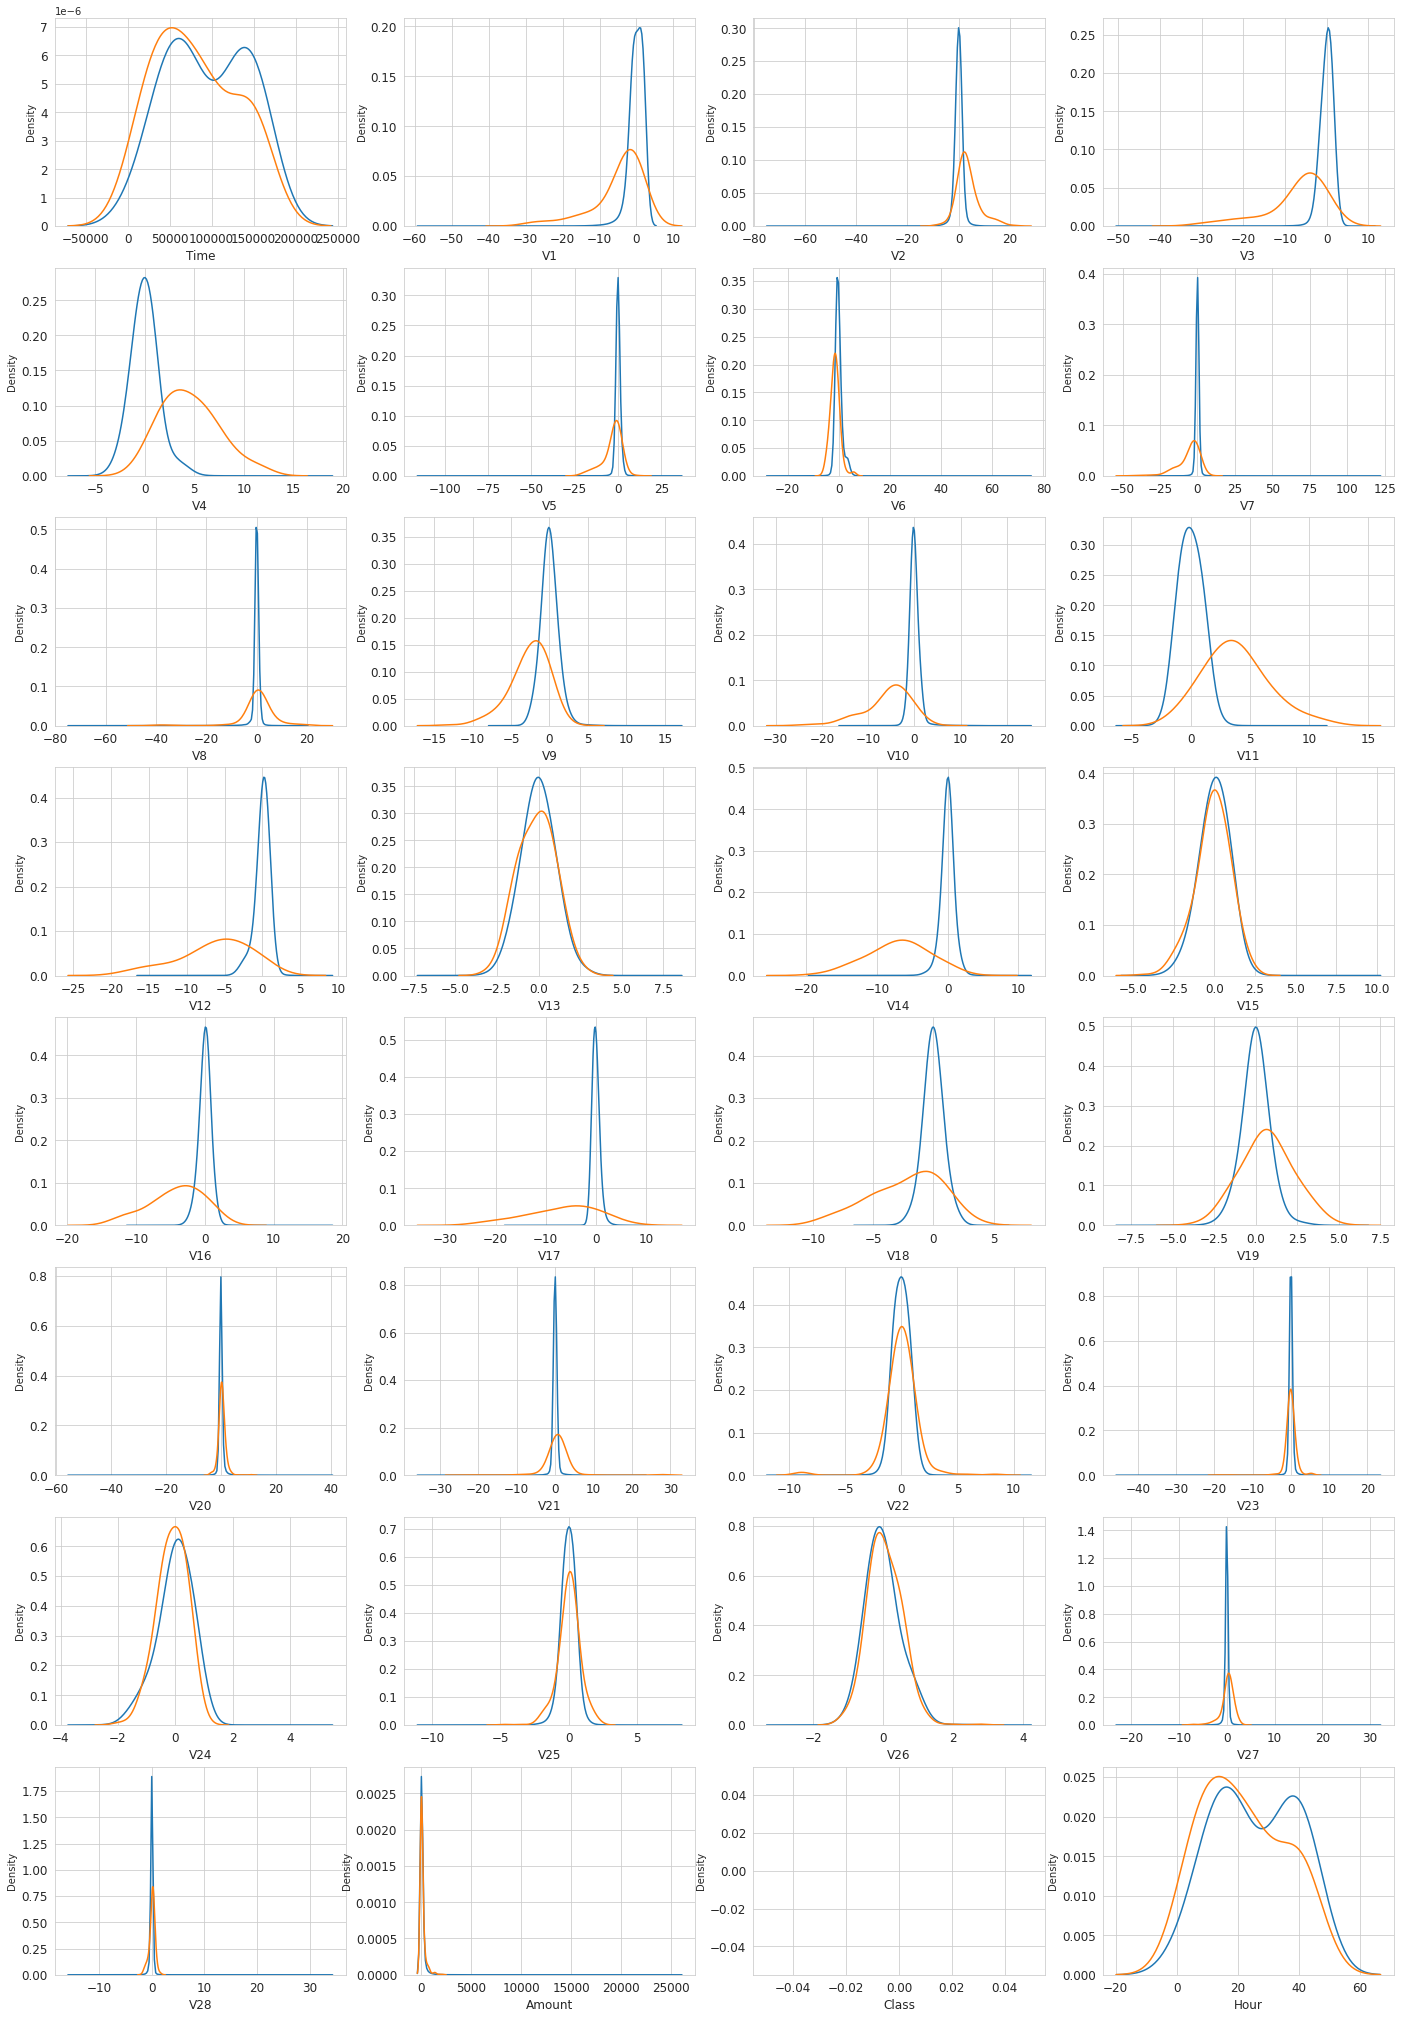

In [ ]:
var=data.columns.values

i=0
t1=data[data.Class==1]
t0=data[data.Class==0]

sns.set_style('whitegrid')
plt.figure()
fig,ax=plt.subplots(8,4,figsize=(24,36))

for f in var:
  i+=1
  plt.subplot(8,4,i)
  sns.kdeplot(t0[f],bw_method=0.5,label='Class 0',warn_singular=False)
  sns.kdeplot(t1[f],bw_method=0.5,label='Class 1',warn_singular=False)
  plt.xlabel(f,fontsize=12)
  locs,labels=plt.xticks()
  plt.tick_params(axis='both',which='major',labelsize=12)

plt.show()


In [5]:
#Creating data for modelling

X=data.drop('Class',axis=1)
y=data['Class']

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,shuffle=True,random_state=2023)

## Random Forest Classifier

In [ ]:
param_dist={'criterion':['gini','entropy'],'n_estimators':[20,40,60,80,100],'min_samples_split':[1,2,3,4,5],'min_samples_leaf':[1,2,3,4,5]}

clf=RandomizedSearchCV(RandomForestClassifier(),param_distributions=param_dist,scoring='roc_auc',cv=3,verbose=5,n_iter=5)


In [ ]:
clf.fit(X_train,y_train)

Fitting 3 folds for each of 5 candidates, totalling 15 fits
[CV 1/3] END criterion=entropy, min_samples_leaf=5, min_samples_split=4, n_estimators=40;, score=0.960 total time=  27.4s
[CV 2/3] END criterion=entropy, min_samples_leaf=5, min_samples_split=4, n_estimators=40;, score=0.961 total time=  25.0s
[CV 3/3] END criterion=entropy, min_samples_leaf=5, min_samples_split=4, n_estimators=40;, score=0.953 total time=  26.8s
[CV 1/3] END criterion=gini, min_samples_leaf=5, min_samples_split=3, n_estimators=100;, score=0.955 total time= 1.7min
[CV 2/3] END criterion=gini, min_samples_leaf=5, min_samples_split=3, n_estimators=100;, score=0.959 total time= 1.6min
[CV 3/3] END criterion=gini, min_samples_leaf=5, min_samples_split=3, n_estimators=100;, score=0.962 total time= 1.8min
[CV 1/3] END criterion=entropy, min_samples_leaf=5, min_samples_split=5, n_estimators=60;, score=0.956 total time=  39.7s
[CV 2/3] END criterion=entropy, min_samples_leaf=5, min_samples_split=5, n_estimators=60;, s

RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_iter=5,
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'min_samples_leaf': [1, 2, 3, 4, 5],
                                        'min_samples_split': [1, 2, 3, 4, 5],
                                        'n_estimators': [20, 40, 60, 80, 100]},
                   scoring='roc_auc', verbose=5)

In [ ]:
clf.best_params_

{'n_estimators': 100,
 'min_samples_split': 3,
 'min_samples_leaf': 5,
 'criterion': 'gini'}

In [ ]:
clf=RandomForestClassifier(criterion='gini',n_estimators=100,min_samples_split=4,min_samples_leaf=4)
clf.fit(X_train,y_train)

RandomForestClassifier(min_samples_leaf=4, min_samples_split=4)

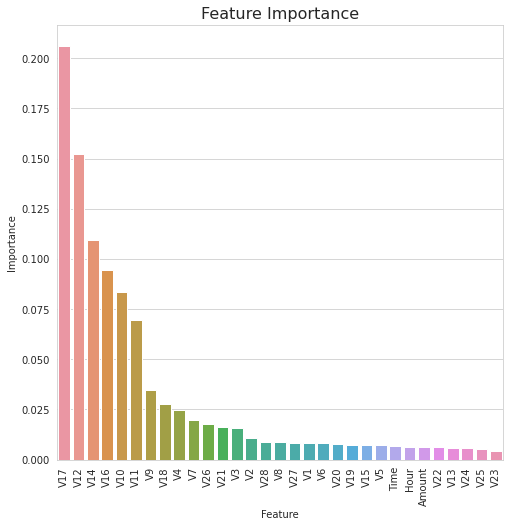

In [ ]:
##Feature Importance

feat_imp=pd.DataFrame({'Feature':X.columns,'Importance':clf.feature_importances_}).sort_values(['Importance'],ascending=False)
plt.figure(figsize=(8,8))
s=sns.barplot(x='Feature',y='Importance',data=feat_imp)
s.set_xticklabels(s.get_xticklabels(),rotation=90)
plt.title('Feature Importance',fontsize=16)
plt.show()

The most important features for the Random Forest are V12, V14, V17, V10, V16, V11 and V9

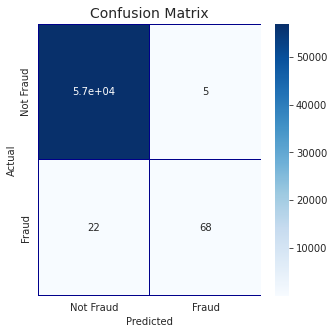

In [ ]:
## Confusion Matrix

con_mat=pd.crosstab(y_test,clf.predict(X_test),rownames=['Actual'],colnames=['Predicted'])
fig,ax1=plt.subplots(ncols=1,figsize=(5,5))

sns.heatmap(con_mat,annot=True,cmap='Blues',ax=ax1,linewidth=0.2,linecolor='Darkblue',
            xticklabels=['Not Fraud','Fraud'],yticklabels=['Not Fraud','Fraud'])

plt.title('Confusion Matrix',fontsize=14)
plt.show()

The random forest classifier performance on test set:


1. Type 1 error = False Positives = 5/(5+57000) = 0.008%

2. Type 2 error = False Negatives = 22/(22+68) = 24.44%


In [ ]:
clf.score(X_test,y_test)

0.9995259997893332

AUC score on test data is 0.9995

## XGBoost

In [ ]:
param_dist={'colsample_bylevel':[0.8,0.9,1],'colsample_bytree':[0.4,0.5,0.3],'objective':['binary:logistic'],
            'learning_rate':[0.1,0.2,0.3,0.4,0.05],'max_depth':[1,2,3],'subsample':[0.7,0.75,0.65]}

xgb=XGBClassifier()
clf=RandomizedSearchCV(xgb,param_distributions=param_dist , scoring='roc_auc',cv=3,verbose=5,n_iter=5)


In [ ]:
clf.fit(X_train,y_train)

Fitting 3 folds for each of 5 candidates, totalling 15 fits
[CV 1/3] END colsample_bylevel=0.9, colsample_bytree=0.3, learning_rate=0.4, max_depth=2, objective=binary:logistic, subsample=0.65;, score=0.972 total time=   8.5s
[CV 2/3] END colsample_bylevel=0.9, colsample_bytree=0.3, learning_rate=0.4, max_depth=2, objective=binary:logistic, subsample=0.65;, score=0.980 total time=   7.8s
[CV 3/3] END colsample_bylevel=0.9, colsample_bytree=0.3, learning_rate=0.4, max_depth=2, objective=binary:logistic, subsample=0.65;, score=0.987 total time=   7.9s
[CV 1/3] END colsample_bylevel=0.9, colsample_bytree=0.3, learning_rate=0.1, max_depth=2, objective=binary:logistic, subsample=0.7;, score=0.977 total time=   9.0s
[CV 2/3] END colsample_bylevel=0.9, colsample_bytree=0.3, learning_rate=0.1, max_depth=2, objective=binary:logistic, subsample=0.7;, score=0.978 total time=   8.0s
[CV 3/3] END colsample_bylevel=0.9, colsample_bytree=0.3, learning_rate=0.1, max_depth=2, objective=binary:logistic, 

RandomizedSearchCV(cv=3,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           gamma=None, gpu_id=None,
                                           grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate...
                                           monotone_constraints=None,
                         

In [ ]:
clf.best_params_

{'subsample': 0.65,
 'objective': 'binary:logistic',
 'max_depth': 2,
 'learning_rate': 0.4,
 'colsample_bytree': 0.3,
 'colsample_bylevel': 0.9}

In [ ]:
clf=XGBClassifier(colsample_bylevel=0.9,colsample_bytree=0.4,objective='binary:logistic',
            learning_rate=0.3,max_depth=1,subsample=0.65)
clf.fit(X_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=0.9, colsample_bynode=None,
              colsample_bytree=0.4, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.3, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=1, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

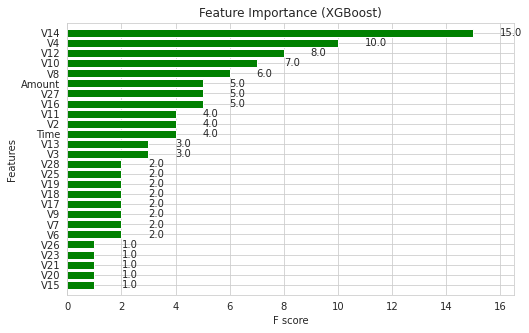

In [ ]:
# Feature Importance

fig,ax1=plt.subplots(ncols=1,figsize=(8,5))
xgb.plot_importance(clf,height=0.8,title='Feature Importance (XGBoost)',ax=ax1,color='green')
plt.show()

The most important features for the XGBoost are V14, V4, V12, V8, V16, V11 and V27




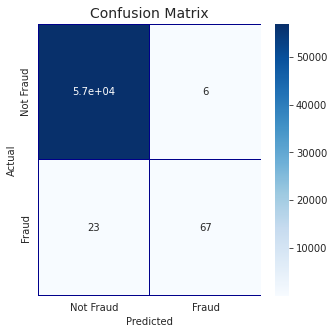

In [ ]:
con_mat=pd.crosstab(y_test,clf.predict(X_test),rownames=['Actual'],colnames=['Predicted'])
fig,ax1=plt.subplots(ncols=1,figsize=(5,5))

sns.heatmap(con_mat,annot=True,cmap='Blues',ax=ax1,linewidth=0.2,linecolor='Darkblue',
            xticklabels=['Not Fraud','Fraud'],yticklabels=['Not Fraud','Fraud'])

plt.title('Confusion Matrix',fontsize=14)
plt.show()

The xgboost classifier performance:


1. Type 1 error = False Positives = 6/(6+57000) = 0.01%

2. Type 2 error = False Negatives = 23/(23+67) = 25.55%


In [ ]:
clf.score(X_test,y_test)

0.9994908886626171

AUC score obtained on test is 0.9994

## Linear Discriminant Analysis (LDA)

In [9]:
clf = LinearDiscriminantAnalysis()
clf.fit(X_train, y_train)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(X_train, y_train)

predict_y = sig_clf.predict_proba(X_train)
print("The train log loss is:",log_loss(y_train, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(X_test)
print("The test log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))


The train log loss is: 0.005174274435952179
The test log loss is: 0.005612091921371856


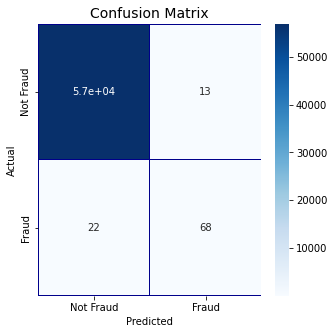

In [10]:
con_mat=pd.crosstab(y_test,clf.predict(X_test),rownames=['Actual'],colnames=['Predicted'])
fig,ax1=plt.subplots(ncols=1,figsize=(5,5))

sns.heatmap(con_mat,annot=True,cmap='Blues',ax=ax1,linewidth=0.2,linecolor='Darkblue',
            xticklabels=['Not Fraud','Fraud'],yticklabels=['Not Fraud','Fraud'])

plt.title('Confusion Matrix',fontsize=14)
plt.show()

## K Nearest Neighbors

In [ ]:
X_train,X_cv,y_train,y_cv=train_test_split(X_train,y_train,test_size=0.2,shuffle=True)

In [ ]:
import random
alpha=[i for i in range(1,100,2)]
k=[random.choice(alpha) for i in range(5)]
cv_log_error_array=[]

for i in k:
  clf=KNeighborsClassifier(n_neighbors=i)
  clf.fit(X_train,y_train)
  sig_clf=CalibratedClassifierCV(clf,method='sigmoid')
  sig_clf.fit(X_train,y_train)
  sig_clf_probs = sig_clf.predict_proba(X_cv)
  cv_log_error_array.append(log_loss(y_cv, sig_clf_probs, labels=clf.classes_, eps=1e-15))
  print("Log Loss :",log_loss(y_cv, sig_clf_probs))

Log Loss : 0.0121742646579113
Log Loss : 0.01212836322214962
Log Loss : 0.011691815885442354
Log Loss : 0.012135490572480376
Log Loss : 0.012220812487109437


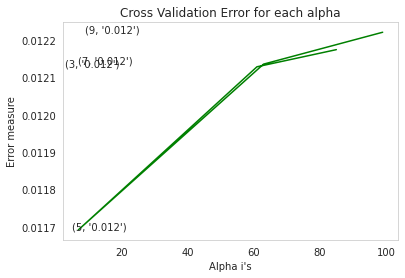

In [ ]:
fig, ax = plt.subplots()
ax.plot(k, cv_log_error_array,c='g')
for i, txt in enumerate(np.round(cv_log_error_array,3)):
    ax.annotate((alpha[i],str(txt)), (alpha[i],cv_log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()

In [ ]:
best_alpha = np.argmin(cv_log_error_array)
clf = KNeighborsClassifier(n_neighbors=k[best_alpha])
clf.fit(X_train, y_train)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(X_train, y_train)

predict_y = sig_clf.predict_proba(X_train)
print('For values of best alpha = ', k[best_alpha], "The train log loss is:",log_loss(y_train, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(X_cv)
print('For values of best alpha = ', k[best_alpha], "The cross validation log loss is:",log_loss(y_cv, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(X_test)
print('For values of best alpha = ', k[best_alpha], "The test log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))


For values of best alpha =  7 The train log loss is: 0.007586790047042876
For values of best alpha =  7 The cross validation log loss is: 0.011691815885442354
For values of best alpha =  7 The test log loss is: 0.010260801982821813


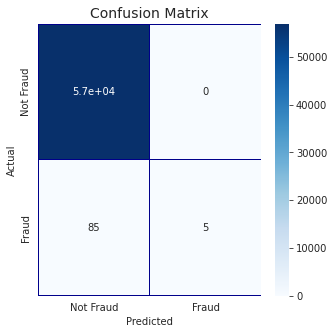

In [ ]:
con_mat=pd.crosstab(y_test,clf.predict(X_test),rownames=['Actual'],colnames=['Predicted'])
fig,ax1=plt.subplots(ncols=1,figsize=(5,5))

sns.heatmap(con_mat,annot=True,cmap='Blues',ax=ax1,linewidth=0.2,linecolor='Darkblue',
            xticklabels=['Not Fraud','Fraud'],yticklabels=['Not Fraud','Fraud'])

plt.title('Confusion Matrix',fontsize=14)
plt.show()

In KNN with k=7, although the type 1 error is  zero but it does not perform any good with class with fewer points. KNN here is heavily impacted by imbalanced dataset and as observed, Type 2 error is too high.


## Logistic Regression ( With class balancing )

for alpha = 1e-06
Log Loss : 0.012202356534831902
for alpha = 1e-05
Log Loss : 0.012202356534831902
for alpha = 0.0001
Log Loss : 0.012202356534831902
for alpha = 0.001
Log Loss : 0.012202356534831902
for alpha = 0.01
Log Loss : 0.012202356534831902
for alpha = 0.1
Log Loss : 0.012202356534831902
for alpha = 1
Log Loss : 0.012169421165901577
for alpha = 10
Log Loss : 0.012098503592536402
for alpha = 100
Log Loss : 0.012101654230231683


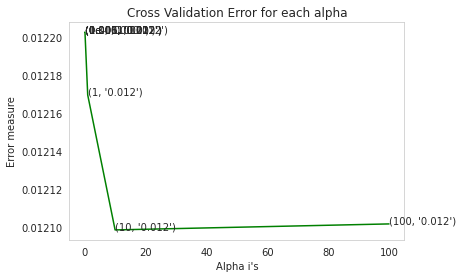

For values of best alpha =  10 The train log loss is: 0.013023558474553273
For values of best alpha =  10 The cross validation log loss is: 0.012098503592536402
For values of best alpha =  10 The test log loss is: 0.01168865738640433


In [ ]:
alpha = [10 ** x for x in range(-6, 3)]
cv_log_error_array = []
for i in alpha:
    print("for alpha =", i)
    clf = SGDClassifier(class_weight='balanced', alpha=i, penalty='l2', loss='log', random_state=42)
    clf.fit(X_train, y_train)
    sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
    sig_clf.fit(X_train, y_train)
    sig_clf_probs = sig_clf.predict_proba(X_cv)
    cv_log_error_array.append(log_loss(y_cv, sig_clf_probs, labels=clf.classes_, eps=1e-15))
    print("Log Loss :",log_loss(y_cv, sig_clf_probs)) 

fig, ax = plt.subplots()
ax.plot(alpha, cv_log_error_array,c='g')
for i, txt in enumerate(np.round(cv_log_error_array,3)):
    ax.annotate((alpha[i],str(txt)), (alpha[i],cv_log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()


best_alpha = np.argmin(cv_log_error_array)
clf = SGDClassifier(class_weight='balanced', alpha=alpha[best_alpha], penalty='l2', loss='log', random_state=42)
clf.fit(X_train, y_train)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(X_train, y_train)

predict_y = sig_clf.predict_proba(X_train)
print('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",log_loss(y_train, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(X_cv)
print('For values of best alpha = ', alpha[best_alpha], "The cross validation log loss is:",log_loss(y_cv, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(X_test)
print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))

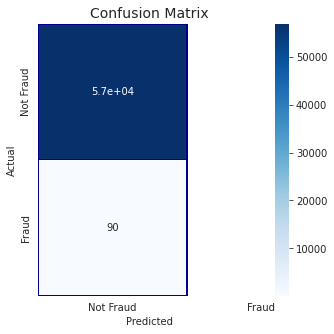

In [ ]:
con_mat=pd.crosstab(y_test,clf.predict(X_test),rownames=['Actual'],colnames=['Predicted'])
fig,ax1=plt.subplots(ncols=1,figsize=(5,5))

sns.heatmap(con_mat,annot=True,cmap='Blues',ax=ax1,linewidth=0.2,linecolor='Darkblue',
            xticklabels=['Not Fraud','Fraud'],yticklabels=['Not Fraud','Fraud'])

plt.title('Confusion Matrix',fontsize=14)
plt.show()

## Logistic Regression ( Without class balancing )

for alpha = 1e-06
Log Loss : 0.012202356534831902
for alpha = 1e-05
Log Loss : 0.012202356534831902
for alpha = 0.0001
Log Loss : 0.012202356534831902
for alpha = 0.001
Log Loss : 0.012202356534831902
for alpha = 0.01
Log Loss : 0.012163639618892864
for alpha = 0.1
Log Loss : 0.012116293659918677
for alpha = 1
Log Loss : 0.012127762576558005
for alpha = 10
Log Loss : 0.01213611399202634
for alpha = 100
Log Loss : 0.012137317029572428


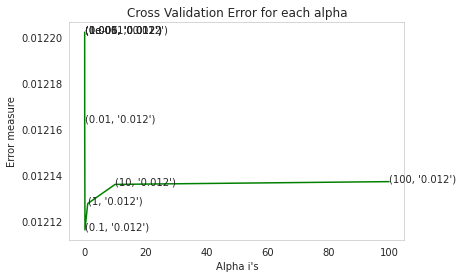

For values of best alpha =  0.1 The train log loss is: 0.01313650093794623
For values of best alpha =  0.1 The cross validation log loss is: 0.012202356534831902
For values of best alpha =  0.1 The test log loss is: 0.011787050049108828


In [ ]:
alpha = [10 ** x for x in range(-6, 3)]
cv_log_error_array = []
for i in alpha:
    print("for alpha =", i)
    clf = SGDClassifier( alpha=i, penalty='l2', loss='log', random_state=42)
    clf.fit(X_train, y_train)
    sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
    sig_clf.fit(X_train, y_train)
    sig_clf_probs = sig_clf.predict_proba(X_cv)
    cv_log_error_array.append(log_loss(y_cv, sig_clf_probs, labels=clf.classes_, eps=1e-15))
    print("Log Loss :",log_loss(y_cv, sig_clf_probs)) 

fig, ax = plt.subplots()
ax.plot(alpha, cv_log_error_array,c='g')
for i, txt in enumerate(np.round(cv_log_error_array,3)):
    ax.annotate((alpha[i],str(txt)), (alpha[i],cv_log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()


best_alpha = np.argmin(cv_log_error_array)
clf = SGDClassifier(class_weight='balanced', alpha=alpha[best_alpha], penalty='l2', loss='log', random_state=42)
clf.fit(X_train, y_train)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(X_train, y_train)

predict_y = sig_clf.predict_proba(X_train)
print('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",log_loss(y_train, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(X_cv)
print('For values of best alpha = ', alpha[best_alpha], "The cross validation log loss is:",log_loss(y_cv, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(X_test)
print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))

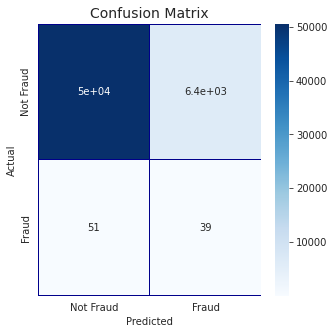

In [ ]:
con_mat=pd.crosstab(y_test,clf.predict(X_test),rownames=['Actual'],colnames=['Predicted'])
fig,ax1=plt.subplots(ncols=1,figsize=(5,5))

sns.heatmap(con_mat,annot=True,cmap='Blues',ax=ax1,linewidth=0.2,linecolor='Darkblue',
            xticklabels=['Not Fraud','Fraud'],yticklabels=['Not Fraud','Fraud'])

plt.title('Confusion Matrix',fontsize=14)
plt.show()

So, the dataset is so heavily imbalanced that logistic regression without balancing performance is worse. Type 1 error increases heavily.

## Naive Bayes

In [ ]:
clf = GaussianNB()
clf.fit(X_train, y_train)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(X_train, y_train)


predict_y = sig_clf.predict_proba(X_train)
print('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",log_loss(y_train, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(X_cv)
print('For values of best alpha = ', alpha[best_alpha], "The cross validation log loss is:",log_loss(y_cv, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(X_test)
print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))


For values of best alpha =  0.1 The train log loss is: 0.00842033060155767
For values of best alpha =  0.1 The cross validation log loss is: 0.006835181896628436
For values of best alpha =  0.1 The test log loss is: 0.007947790775254149


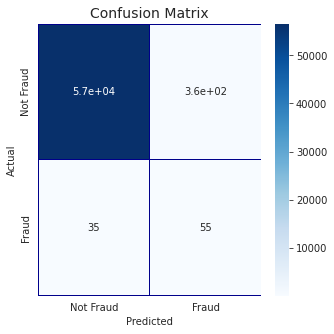

In [ ]:
con_mat=pd.crosstab(y_test,clf.predict(X_test),rownames=['Actual'],colnames=['Predicted'])
fig,ax1=plt.subplots(ncols=1,figsize=(5,5))

sns.heatmap(con_mat,annot=True,cmap='Blues',ax=ax1,linewidth=0.2,linecolor='Darkblue',
            xticklabels=['Not Fraud','Fraud'],yticklabels=['Not Fraud','Fraud'])

plt.title('Confusion Matrix',fontsize=14)
plt.show()

Definitely not the model to use as results are not favourable